<a href="https://colab.research.google.com/github/won0503/Breast_Cancer_Classification/blob/master/Working_Hours_Descriptive_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 📊 Retail Working Hours Optimization - Descriptive Analytics Report
This notebook performs preliminary descriptive analysis on working hours, sales (SLS), and empty returns (EMP) from The Beer Store's consolidated data after the 2024 retail landscape change.

In [1]:
from google.colab import files
uploaded = files.upload()  # Upload 'Consolidated DB.xlsx'

Saving Consolidated DB.xlsx to Consolidated DB.xlsx


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Excel file
file_path = 'Consolidated DB.xlsx'
df = pd.read_excel(file_path, sheet_name='Merge', header=1)

# Rename and clean
df.columns = ['Calendar_Year', 'Calendar_Month', 'Retail_location', 'WFS_Hours', 'EMP_Count', 'SLS_Count']
df = df.dropna()
df['Calendar_Year'] = df['Calendar_Year'].astype(int)
df['Calendar_Month'] = df['Calendar_Month'].astype(int)
df['Retail_location'] = df['Retail_location'].astype(int)
df['WFS_Hours'] = df['WFS_Hours'].astype(float)
df['EMP_Count'] = df['EMP_Count'].astype(int)
df['SLS_Count'] = df['SLS_Count'].astype(int)
df['Date'] = pd.to_datetime(df['Calendar_Year'].astype(str) + '-' + df['Calendar_Month'].astype(str) + '-01')
df.head()

,Calendar_Year,Calendar_Month,Retail_location,WFS_Hours,EMP_Count,SLS_Count,Date
0,2020,1,2002,998.610,3798,18997,2020-01-01
1,2020,1,2004,791.751,2996,11271,2020-01-01
2,2020,1,2005,882.037,4395,11809,2020-01-01
3,2020,1,2006,1099.548,5730,19731,2020-01-01
4,2020,1,2007,785.991,4580,10774,2020-01-01


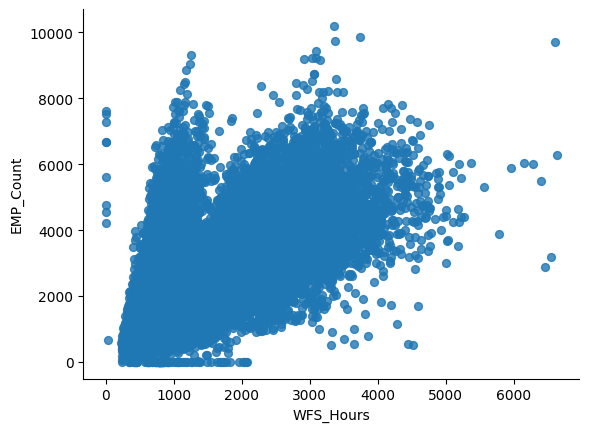

In [4]:
# @title WFS_Hours vs EMP_Count

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='WFS_Hours', y='EMP_Count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

### 📌 Summary Statistics

In [10]:
df[['WFS_Hours', 'EMP_Count', 'SLS_Count']].describe()

,WFS_Hours,EMP_Count,SLS_Count
count,19986.000000,19986.000000,19986.000000
mean,1766.697744,3106.818673,9688.967027
std,888.141221,1488.515259,4592.015862
min,0.000000,1.000000,553.000000
25%,1006.531250,1982.000000,6051.000000
50%,1712.699500,3094.000000,9343.000000
75%,2366.951000,4109.000000,12661.750000
max,6626.396000,10199.000000,30258.000000


### 📈 Monthly Averages Over Time

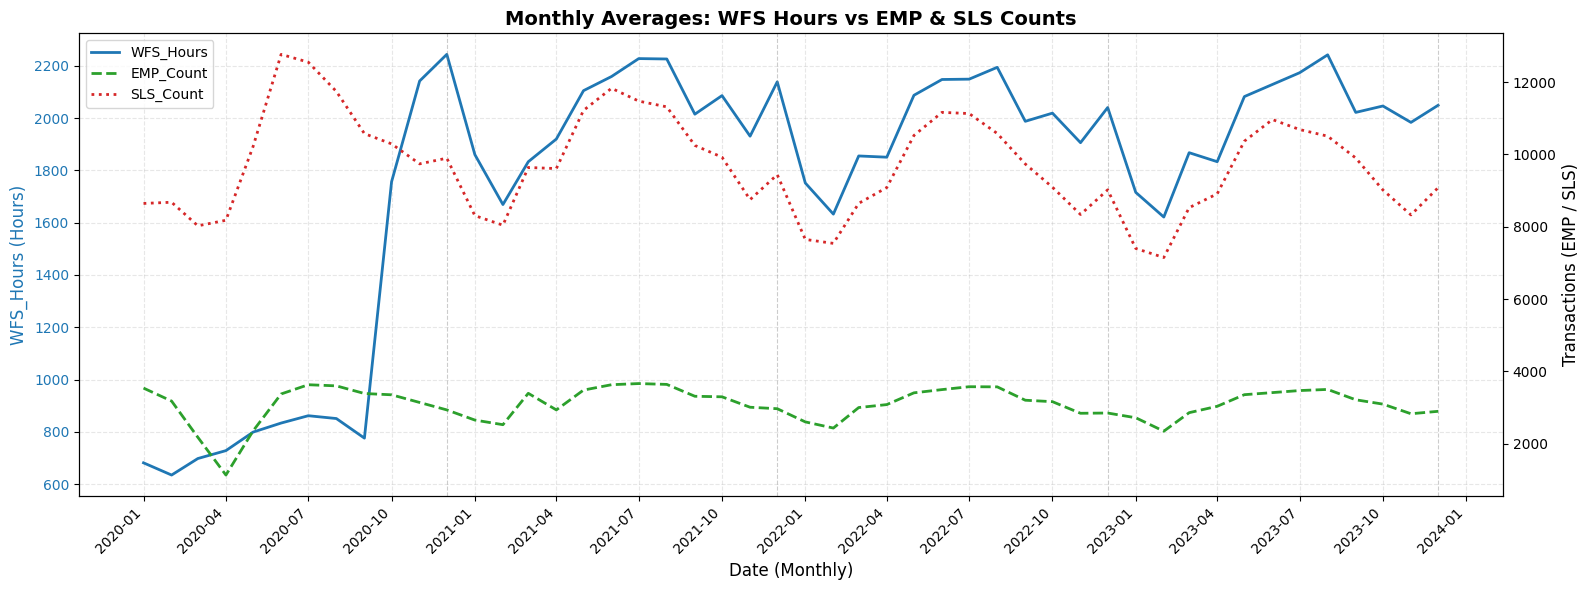

In [17]:
import matplotlib.dates as mdates

# Group monthly average
monthly_avg = df.groupby('Date')[['WFS_Hours', 'EMP_Count', 'SLS_Count']].mean().reset_index()

# Create plot
fig, ax1 = plt.subplots(figsize=(16, 6))

# Plot WFS_Hours on primary y-axis (left)
color1 = 'tab:blue'
ax1.set_xlabel('Date (Monthly)', fontsize=12)
ax1.set_ylabel('WFS_Hours (Hours)', color=color1, fontsize=12)
ax1.plot(monthly_avg['Date'], monthly_avg['WFS_Hours'], label='WFS_Hours', color=color1, linewidth=2)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, which='major', axis='both', linestyle='--', alpha=0.3)

# Format x-axis: show major ticks every 3 months
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# Plot EMP and SLS on secondary y-axis (right)
ax2 = ax1.twinx()

color2 = 'tab:green'
color3 = 'tab:red'
ax2.set_ylabel('Transactions (EMP / SLS)', color='black', fontsize=12)
ax2.plot(monthly_avg['Date'], monthly_avg['EMP_Count'], label='EMP_Count', color=color2, linestyle='--', linewidth=2)
ax2.plot(monthly_avg['Date'], monthly_avg['SLS_Count'], label='SLS_Count', color=color3, linestyle=':', linewidth=2)
ax2.tick_params(axis='y', labelcolor='black')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', fontsize=10)

# Title and layout

year_end_dates = monthly_avg[monthly_avg['Date'].dt.month == 12]['Date']
for d in year_end_dates:
    ax1.axvline(x=d, color='gray', linestyle='--', linewidth=0.8, alpha=0.4)
plt.title('Monthly Averages: WFS Hours vs EMP & SLS Counts', fontsize=14, fontweight='bold')
fig.tight_layout()
plt.show()



### REMARKS:
1. Why are 2020 ~2021 working hours are significantly lower than post 2021 periods?
2. Working hours are seasonal where

### 📦 Distribution of Variables

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(['WFS_Hours', 'EMP_Count', 'SLS_Count']):
    sns.histplot(df[col], kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### 🔗 Correlation Heatmap

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(df[['WFS_Hours', 'EMP_Count', 'SLS_Count']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

### 📅 Monthly Boxplot of WFS Hours

In [ ]:
df['Month'] = df['Date'].dt.month
plt.figure(figsize=(14, 6))
sns.boxplot(x='Month', y='WFS_Hours', data=df)
plt.title('Monthly Distribution of WFS Hours')
plt.grid(True)
plt.tight_layout()
plt.show()

### 🏬 Store-Level Summary

In [ ]:
store_avg = df.groupby('Retail_location')[['WFS_Hours', 'EMP_Count', 'SLS_Count']].mean()
store_avg.describe()